# Enquesta Condicions de vida dels usuaris dels CSS
# Tratamiento de datos
***
***
# 2. Análisis de datos - Exploratorio y Bivariable

***
***
## 2.1 Carga de datos y análisis exploratorio

In [1]:
from scripts.utils import filter_variables

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('data_final/final_df.pkl')
print(df.shape)

df_mayores = df[df['Edad'] >= 65]
print(df_mayores.shape)

(6624, 143)
(1597, 143)


***
***
## 2.2 Graficas

In [2]:
from scripts.plots import plot_bar, plot_box, plot_violin, plot_correlation_matrix
from scripts.plots import plot_scatter, plot_multiple_numeric, plot_stacked_bar_percentage, plot_stacked_bar_percentage_binary

#### Ejemplos

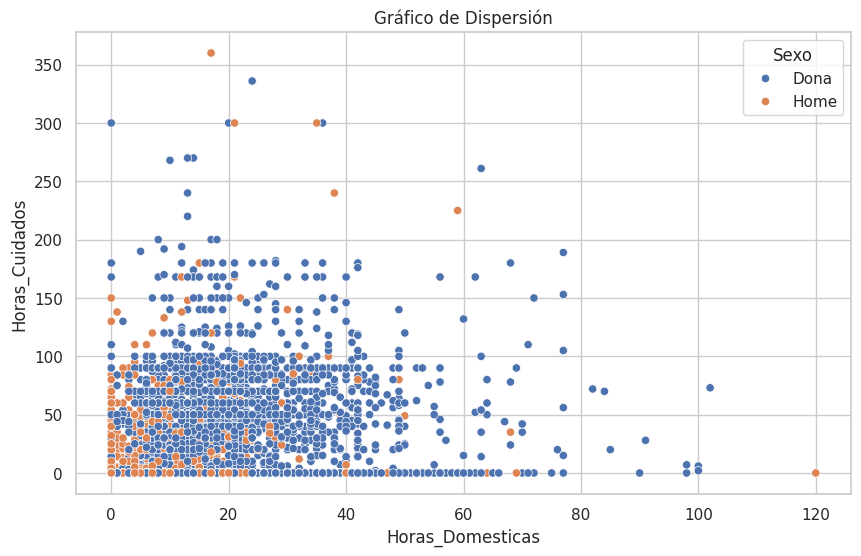

In [3]:
plot_scatter(df, "Horas_Domesticas", "Horas_Cuidados", hue="Sexo")

In [4]:
#sns.pairplot(df[["Sexo", "Edad", "Renda_Total_Llar", "Horas_Domesticas", "Horas_Cuidados", "Horas_Cocinar", "Horas_Comprar_Alim"]], diag_kind="kde", hue="Sexo")

### Graficas capítulo 4

#### Nivel de Estudios

In [5]:
variables = ["Edad_Recod2", "Nivel_Estudios"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 2)
Shape del DataFrame después del filtrado: (6488, 2)
Shape original del DataFrame: (1597, 2)
Shape del DataFrame después del filtrado: (1565, 2)


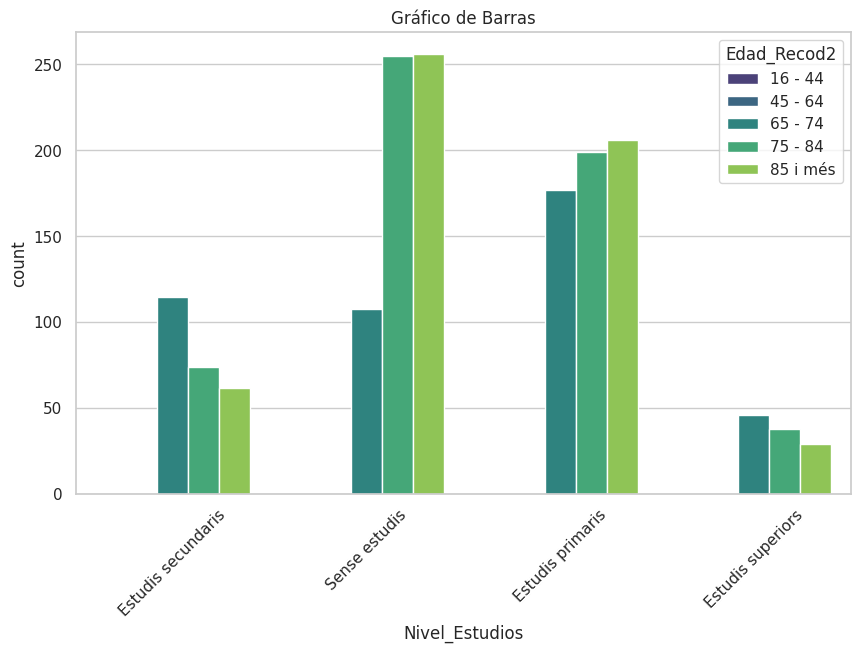

In [6]:
plot_bar(df_filtrado_mayores, "Nivel_Estudios", hue="Edad_Recod2")

<Figure size 1200x600 with 0 Axes>

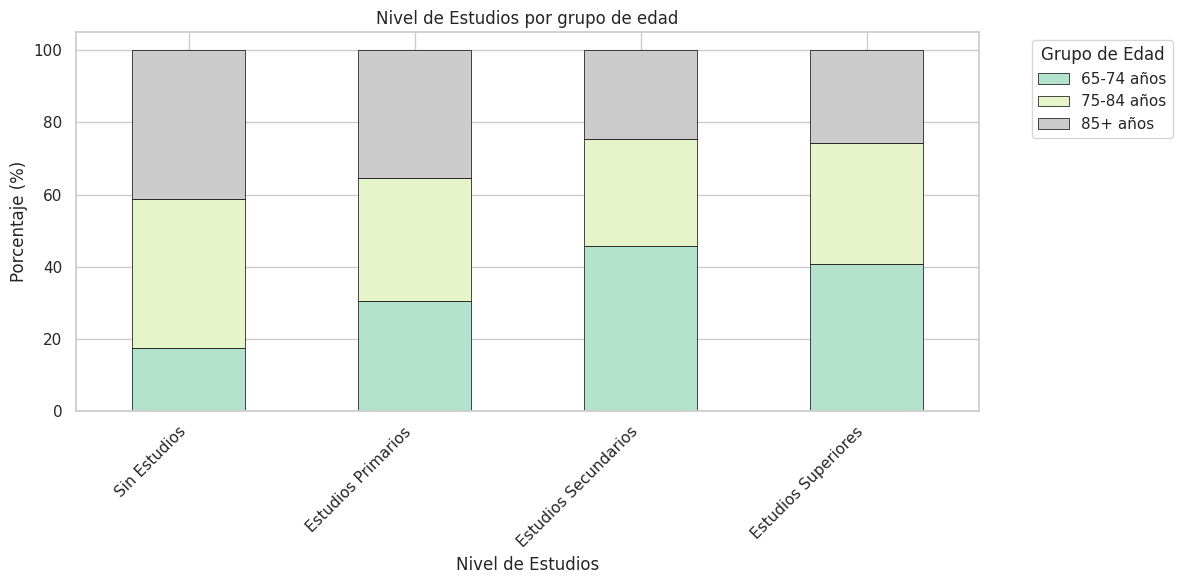

In [12]:
# Diccionario para renombrar las variables en los ejes y la leyenda
rename_dict_vars = {
    "Nivel_Estudios": "Nivel de Estudios",
    "Edad_Recod2": "Grupo de Edad"
}

# Diccionario para renombrar los valores dentro de las variables categóricas
rename_dict_values = {
    "Estudis primaris": "Estudios Primarios",
    "Estudis secundaris": "Estudios Secundarios",
    "Estudis superiors": "Estudios Superiores",
    "Sense estudis": "Sin Estudios",
    "65 - 74": "65-74 años",
    "75 - 84": "75-84 años",
    "85 i més": "85+ años"
}

# Diccionario para ordenar manualmente las categorías en el eje X
custom_order_dict = {
    "Sin Estudios": 1,
    "Estudios Primarios": 2,
    "Estudios Secundarios": 3,
    "Estudios Superiores": 4
}

# Usar la función para generar el gráfico
plot_stacked_bar_percentage(df_filtrado_mayores, "Nivel_Estudios", "Edad_Recod2", 
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            custom_order_dict=custom_order_dict,
                            title="Nivel de Estudios por grupo de edad",
                            cmap="Pastel2")

#### Origen geográfico

In [193]:
variables = ["Edad_Recod", "Edad_Recod2", "Lugar_Nacimiento"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 3)
Shape del DataFrame después del filtrado: (6624, 3)
Shape original del DataFrame: (1597, 3)
Shape del DataFrame después del filtrado: (1597, 3)


<Figure size 1200x600 with 0 Axes>

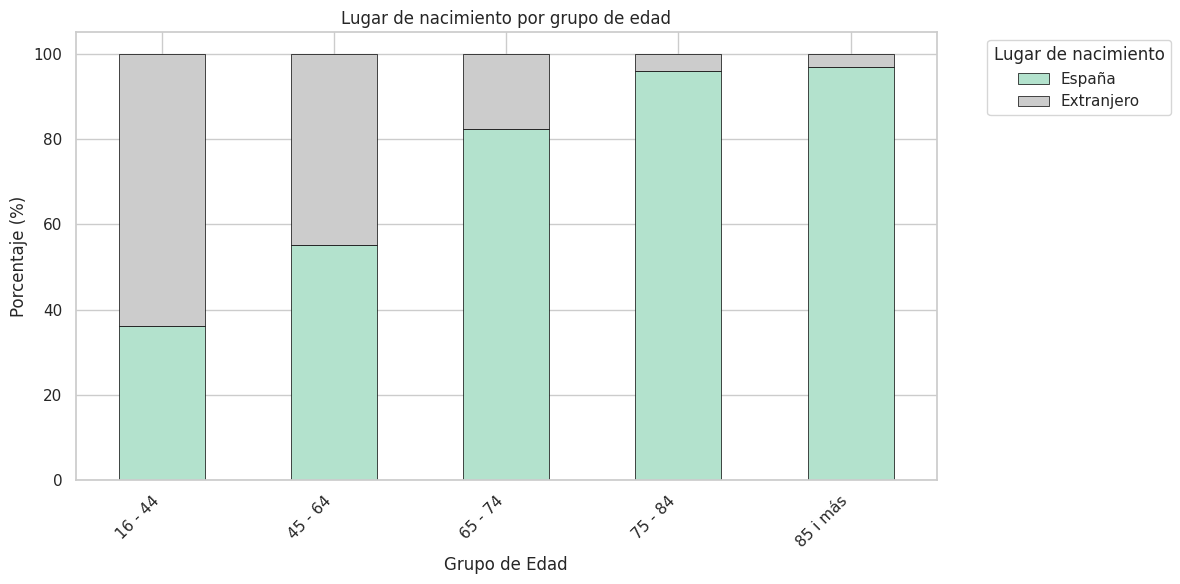

In [194]:
rename_dict_vars = {
    "Lugar_Nacimiento": "Lugar de nacimiento",
    "Edad_Recod2": "Grupo de Edad"
}

rename_dict_values = {
    "Espanya": "España",
    "Estranger": "Extranjero",
    "85 i més": "85 i más"
}

plot_stacked_bar_percentage(df_filtrado, "Edad_Recod2", "Lugar_Nacimiento",
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            title="Lugar de nacimiento por grupo de edad")

### Graficas capítulo 5

#### 5.2 Necesidades personas mayores

In [24]:
variables = ["Sexo", "Edad_Recod2", "Estado_Salud_Recod",  "Nivel_Estudios", "Ingresos_Equivalentes",
             "Visita_CSS_Econom", "Visita_CSS_Familia", "Visita_CSS_Depend", "Visita_CSS_Vivienda"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 9)
Shape del DataFrame después del filtrado: (6201, 9)
Shape original del DataFrame: (1597, 9)
Shape del DataFrame después del filtrado: (1321, 9)


<Figure size 1200x600 with 0 Axes>

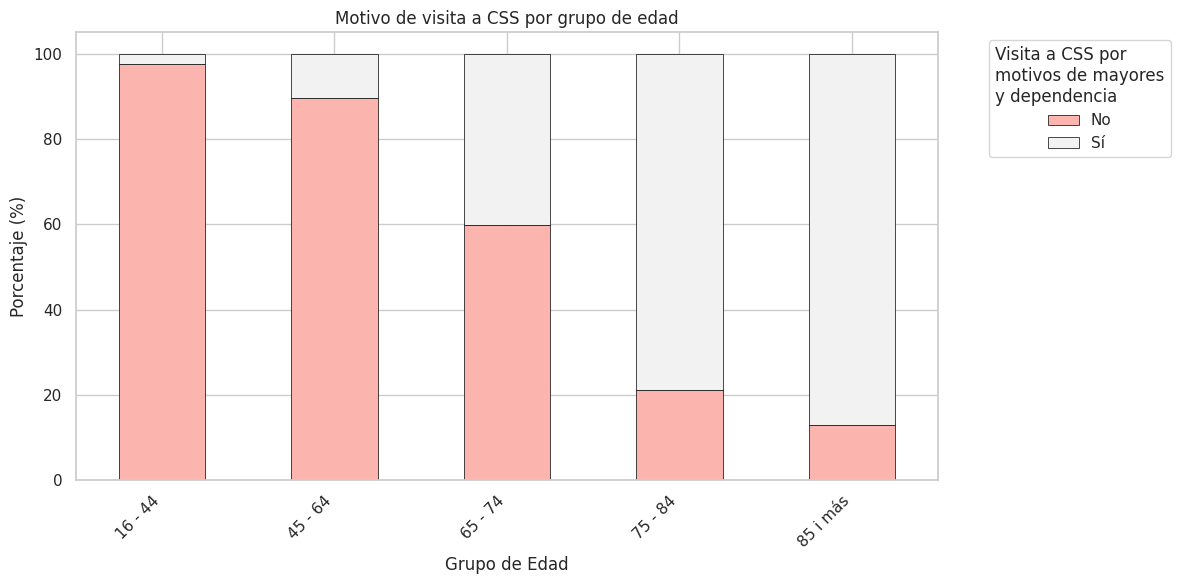

In [25]:
# Diccionario para renombrar las variables en los ejes y la leyenda
rename_dict_vars = {
    "Nivel_Estudios": "Nivel de Estudios",
    "Edad_Recod2": "Grupo de Edad",
    "Visita_CSS_Depend": "Visita a CSS por\nmotivos de mayores\ny dependencia"
}

# Diccionario para renombrar los valores dentro de las variables categóricas
rename_dict_values = {
    "Estudis primaris": "Estudios Primarios",
    "Estudis secundaris": "Estudios Secundarios",
    "Estudis superiors": "Estudios Superiores",
    "Sense estudis": "Sin Estudios",
    "85 i més": "85 i más"
}

# Diccionario para ordenar manualmente las categorías en el eje X
# custom_order_dict = {
#     "Sin Estudios": 1,
#     "Estudios Primarios": 2,
#     "Estudios Secundarios": 3,
#     "Estudios Superiores": 4
# }

# Usar la función para generar el gráfico
plot_stacked_bar_percentage(df_filtrado, "Edad_Recod2", "Visita_CSS_Depend", 
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            custom_order_dict=custom_order_dict,
                            title="Motivo de visita a CSS por grupo de edad",
                            cmap="Pastel1")

<Figure size 1200x600 with 0 Axes>

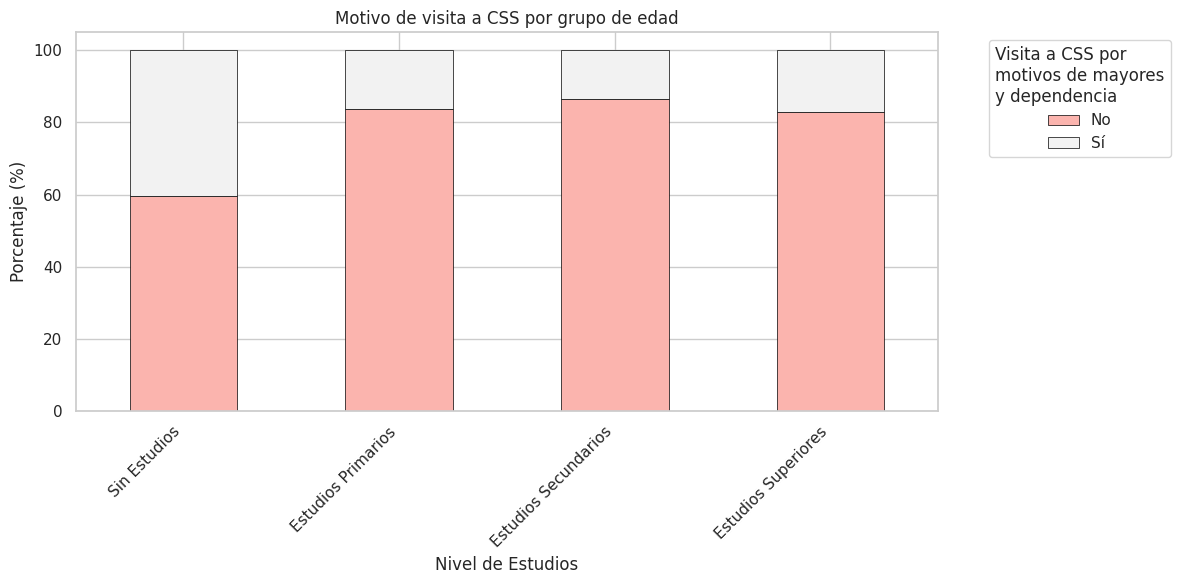

In [23]:
# Usar la función para generar el gráfico
plot_stacked_bar_percentage(df_filtrado, "Nivel_Estudios", "Visita_CSS_Depend", 
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            custom_order_dict=custom_order_dict,
                            title="Motivo de visita a CSS por grupo de edad",
                            cmap="Pastel1")

/home/narki/Projects/doctorado/scripts/plots.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=sns.color_palette(palette))
/home/narki/Projects/doctorado/scripts/plots.py:45: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=x, y=y, palette=sns.color_palette(palette))


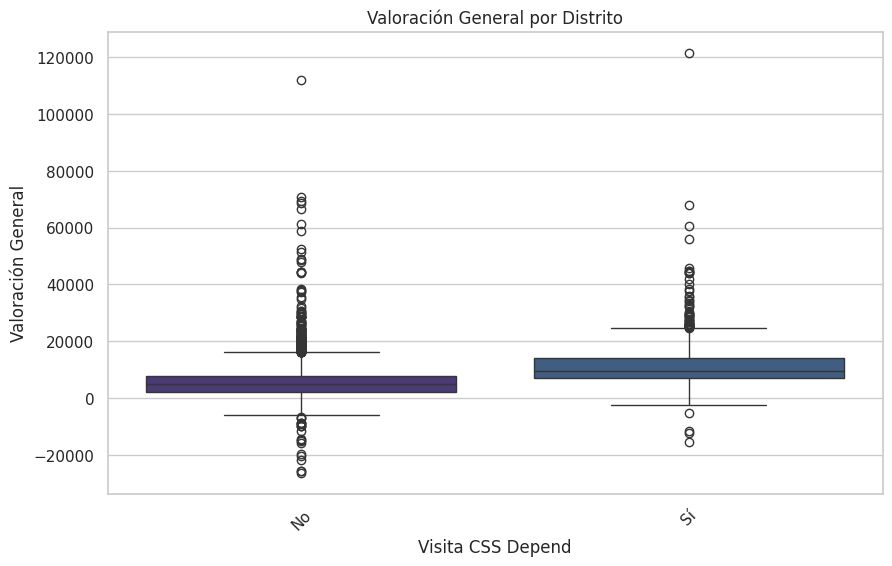

In [26]:
plot_box(df_filtrado, "Visita_CSS_Depend", "Ingresos_Equivalentes", y_label="Valoración General", palette="viridis", title = "Valoración General por Distrito")

#### 5.3 Estado de Salud

In [32]:
variables = ["Sexo", "Edad_Recod2", "Estado_Salud_Recod",  "Nivel_Estudios", "Problemas_Salud"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 5)
Shape del DataFrame después del filtrado: (6194, 5)
Shape original del DataFrame: (1597, 5)
Shape del DataFrame después del filtrado: (1316, 5)


<Figure size 1200x600 with 0 Axes>

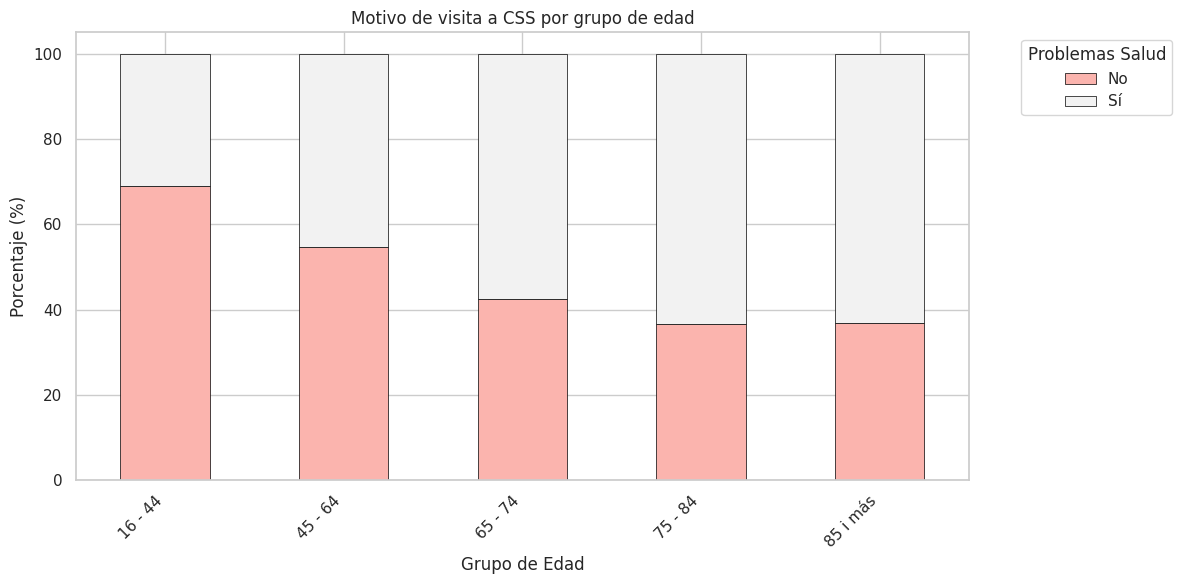

In [36]:
# Diccionario para renombrar las variables en los ejes y la leyenda
rename_dict_vars = {
    "Nivel_Estudios": "Nivel de Estudios",
    "Edad_Recod2": "Grupo de Edad",
    "Visita_CSS_Depend": "Visita a CSS por\nmotivos de mayores\ny dependencia"
}

# Diccionario para renombrar los valores dentro de las variables categóricas
rename_dict_values = {
    "Estudis primaris": "Estudios Primarios",
    "Estudis secundaris": "Estudios Secundarios",
    "Estudis superiors": "Estudios Superiores",
    "Sense estudis": "Sin Estudios",
    "85 i més": "85 i más"
}

# Diccionario para ordenar manualmente las categorías en el eje X
# custom_order_dict = {
#     "Sin Estudios": 1,
#     "Estudios Primarios": 2,
#     "Estudios Secundarios": 3,
#     "Estudios Superiores": 4
# }

# Usar la función para generar el gráfico
plot_stacked_bar_percentage(df_filtrado, "Edad_Recod2", "Problemas_Salud", 
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            custom_order_dict=custom_order_dict,
                            title="Motivo de visita a CSS por grupo de edad",
                            cmap="Pastel1")

#### Vulnerabilidad Económica

In [107]:
# Diccionario de renombre de variables
rename_dict = {
    "Lavadora_Disponible": "Lavadora",
    "TV_Disponible": "Televisión",
    "Telefono_Disponible": "Teléfono",
    "Vater_Disponible": "Váter",
    "Ducha_Disponible": "Ducha",
    "Mala_Ventilacion": "Mala Ventilación",
    "Problemas_Estructura": "Problemas \nEstructurales",
    "Contaminacion_Medioambiental": "Contaminación\nMedioambiental",
    "Delincuencia_Vandalismo": "Delincuencia/\nVandalismo",
    "Vacaciones_Anual": "Vacaciones Anuales",
    "Gasto_Imprevisto_800": "Gasto Imprevisto\n (+800€)",
    "Comida_DosDias": "Comida 2 Días",
    "Temp_Caliente_Invierno": "Temperatura \nCaliente Invierno",
    "TarjetaCredito": "Tarjeta de Crédito",
    "Internet": "Internet en Casa",
    "PC_Disponible": "Ordenador Personal",
    "Coche": "Coche Disponible",
    "Goteras_Humedades": "Goteras o\n Humedades",
    "Escasez_Luz_Natural": "Escasez de\n Luz Natural",
    "Grietas_Paredes": "Grietas en Paredes",
    "Insectos_Ratas": "Insectos o Ratas",
    "Ruido_Vecinos": "Ruido de Vecinos",
}

Shape original del DataFrame: (6624, 13)
Shape del DataFrame después del filtrado: (6549, 13)
Shape original del DataFrame: (1597, 13)
Shape del DataFrame después del filtrado: (1567, 13)


<Figure size 1800x1000 with 0 Axes>

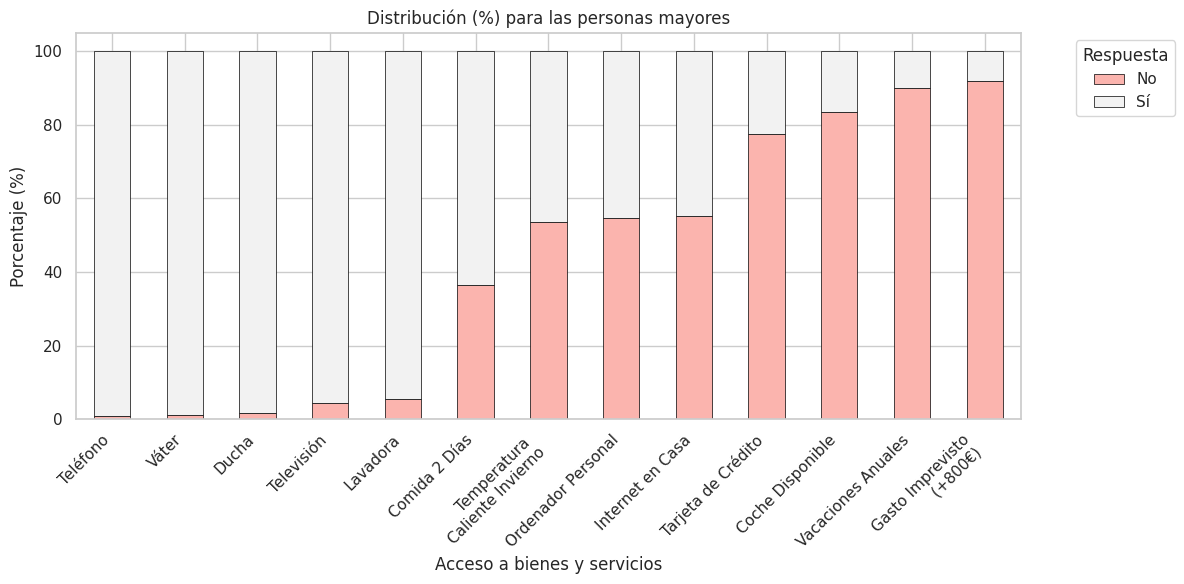

In [108]:
# Lista de variables binarias
variables_acceso = [
    "Lavadora_Disponible", "TV_Disponible", "Telefono_Disponible", "Vater_Disponible", "Ducha_Disponible",
    "Vacaciones_Anual", "Gasto_Imprevisto_800",
    "Comida_DosDias", "Temp_Caliente_Invierno", "TarjetaCredito", "Internet", "PC_Disponible", "Coche"
]

df_filtrado = filter_variables(df[variables_acceso])
df_filtrado_mayores = filter_variables(df_mayores[variables_acceso])

# Uso de la función con el DataFrame
plot_stacked_bar_percentage_binary(df_filtrado, variables_acceso, rename_dict, x_label="Acceso a bienes y servicios", title="Distribución (%) para las personas mayores")

Shape original del DataFrame: (6624, 9)
Shape del DataFrame después del filtrado: (6341, 9)
Shape original del DataFrame: (1597, 9)
Shape del DataFrame después del filtrado: (1540, 9)


<Figure size 1800x1000 with 0 Axes>

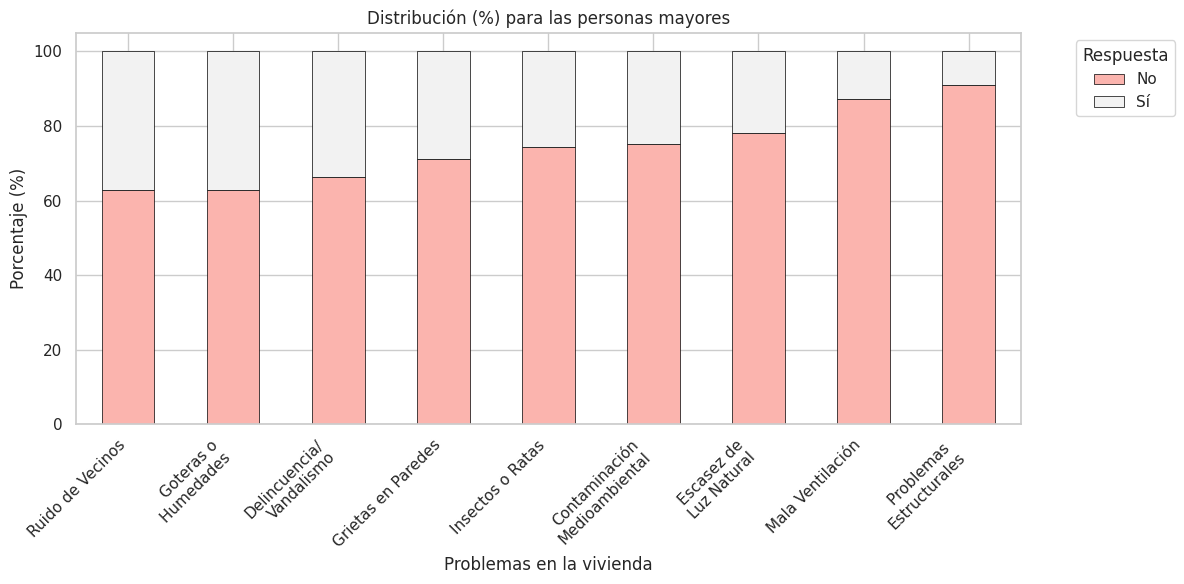

In [109]:
variables_problemas = ["Mala_Ventilacion", "Problemas_Estructura", "Contaminacion_Medioambiental", "Delincuencia_Vandalismo", 
                       "Goteras_Humedades", "Escasez_Luz_Natural", "Grietas_Paredes", "Insectos_Ratas", "Ruido_Vecinos"]

df_filtrado = filter_variables(df[variables_problemas])
df_filtrado_mayores = filter_variables(df_mayores[variables_problemas])

# Uso de la función con el DataFrame
plot_stacked_bar_percentage_binary(df_filtrado, variables_problemas, rename_dict, x_label="Problemas en la vivienda", title="Distribución (%) para las personas mayores")

In [37]:
variables = ["Sexo", "Edad_Recod2", "Propietat_Habitatge"]

df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 3)
Shape del DataFrame después del filtrado: (6619, 3)
Shape original del DataFrame: (1597, 3)
Shape del DataFrame después del filtrado: (1595, 3)


<Figure size 1200x600 with 0 Axes>

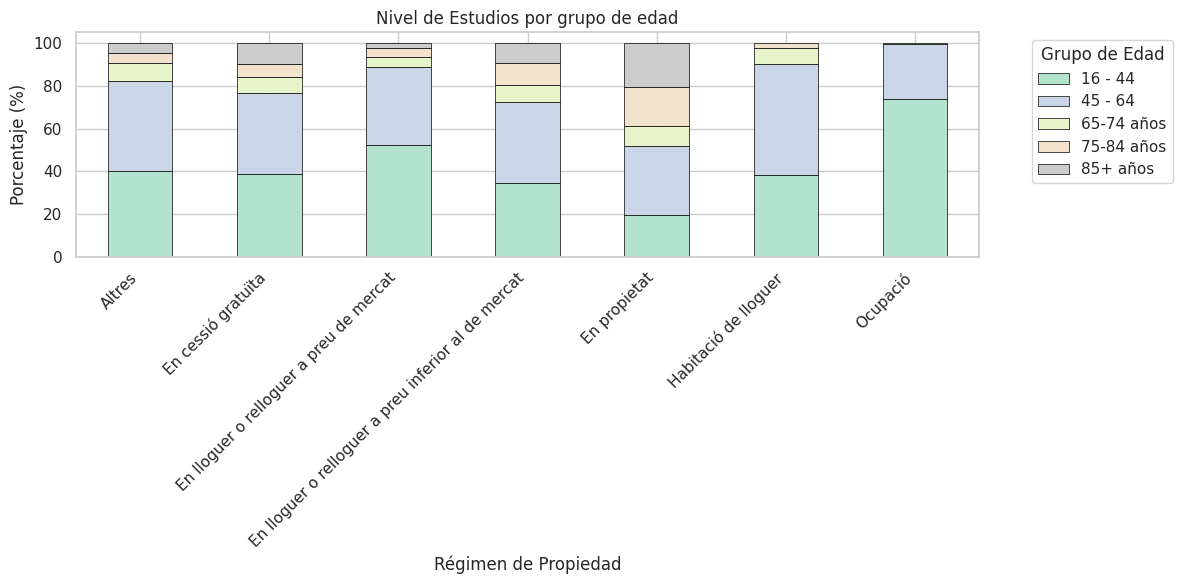

In [39]:
# Diccionario para renombrar las variables en los ejes y la leyenda
rename_dict_vars = {
    "Propietat_Habitatge": "Régimen de Propiedad",
    "Edad_Recod2": "Grupo de Edad"
}

# Diccionario para renombrar los valores dentro de las variables categóricas
rename_dict_values = {
    "Estudis primaris": "Estudios Primarios",
    "Estudis secundaris": "Estudios Secundarios",
    "Estudis superiors": "Estudios Superiores",
    "Sense estudis": "Sin Estudios",
    "65 - 74": "65-74 años",
    "75 - 84": "75-84 años",
    "85 i més": "85+ años"
}

# Diccionario para ordenar manualmente las categorías en el eje X
custom_order_dict = {
    "Sin Estudios": 1,
    "Estudios Primarios": 2,
    "Estudios Secundarios": 3,
    "Estudios Superiores": 4
}

# Usar la función para generar el gráfico
plot_stacked_bar_percentage(df_filtrado, "Propietat_Habitatge", "Edad_Recod2", 
                            rename_dict_vars=rename_dict_vars,
                            rename_dict_values=rename_dict_values,
                            custom_order_dict=custom_order_dict,
                            title="Nivel de Estudios por grupo de edad",
                            cmap="Pastel2")

#### Valoración Atención CSS

In [110]:
variables_num = ['Valoracion_General', 'Valoracion_TiempoEspera', 'Valoracion_Facilidad', 'Valoracion_Horarios', 
                 'Valoracion_Utilidad', 'Valoracion_Dedicacion', 'Valoracion_Intervencion', 'Valoracion_Respuesta', 'Valoracion_Profesionalidad',
                 'Valoracion_Comprension', 'Valoracion_Amabilidad', 'Valoracion_Intimidad']
                 #, 'Valoracion_Utilidad2', 'Valoracion_Gestion', 'Valoracion_Amabilidad2', 'Valoracion_Intimidad2']

variables_num2 = ['Millora_Autonomia', 'Millora_Anim', 'Sentimient_Companyia', 'Sentimient_Tranquilitat', 'Sentimient_Seguretat',
                  'Satisfaccio_Vital', 'Benefici_Familia']

variables_categ = [ #'Visita_CSS_Econom', 'Visita_CSS_Familia', 'Visita_CSS_Depend', 'Visita_CSS_Empleo', 'Visita_CSS_Vivienda', 
                   'Sexo', 'Distrito']  #, 'Estado_Salud_Recod']

df_filtrado = filter_variables(df[variables_num + variables_num2 + variables_categ])
df_filtrado_mayores = filter_variables(df_mayores[variables_num + variables_num2 + variables_categ])

Shape original del DataFrame: (6624, 21)
Shape del DataFrame después del filtrado: (5922, 21)
Shape original del DataFrame: (1597, 21)
Shape del DataFrame después del filtrado: (1341, 21)


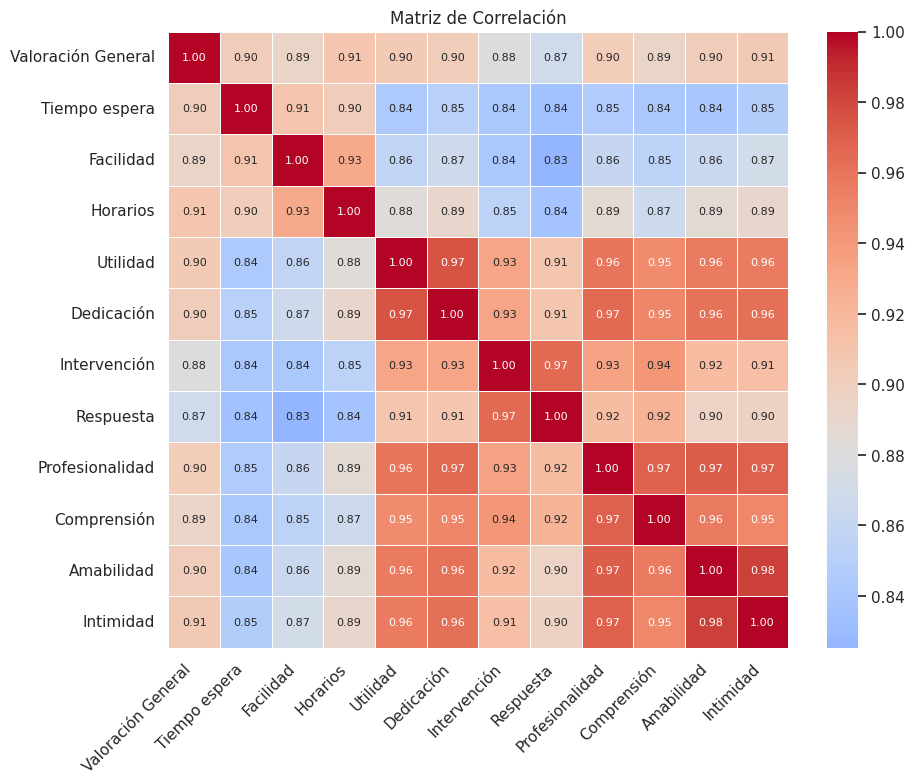

In [111]:
# Diccionario de renombrado para limpiar nombres
rename_dict = {
    "Valoracion_General": "Valoración General",
    "Valoracion_TiempoEspera": "Tiempo espera",
    "Valoracion_Facilidad": "Facilidad",
    "Valoracion_Horarios": "Horarios",
    "Valoracion_Utilidad": "Utilidad",
    "Valoracion_Dedicacion": "Dedicación",
    "Valoracion_Intervencion": "Intervención",
    "Valoracion_Respuesta": "Respuesta",
    "Valoracion_Profesionalidad": "Profesionalidad",
    "Valoracion_Comprension": "Comprensión",
    "Valoracion_Amabilidad": "Amabilidad",
    "Valoracion_Intimidad": "Intimidad"
    # "Valoracion_Utilidad2": "Utilidad 2",
    # "Valoracion_Gestion": "Gestión",
    # "Valoracion_Amabilidad2": "Amabilidad 2",
    # "Valoracion_Intimidad2": "Intimidad 2"
}

plot_correlation_matrix(df_filtrado_mayores[variables_num], annot_size=8, rename_dict=rename_dict, cmap="coolwarm", center_value=0.88)

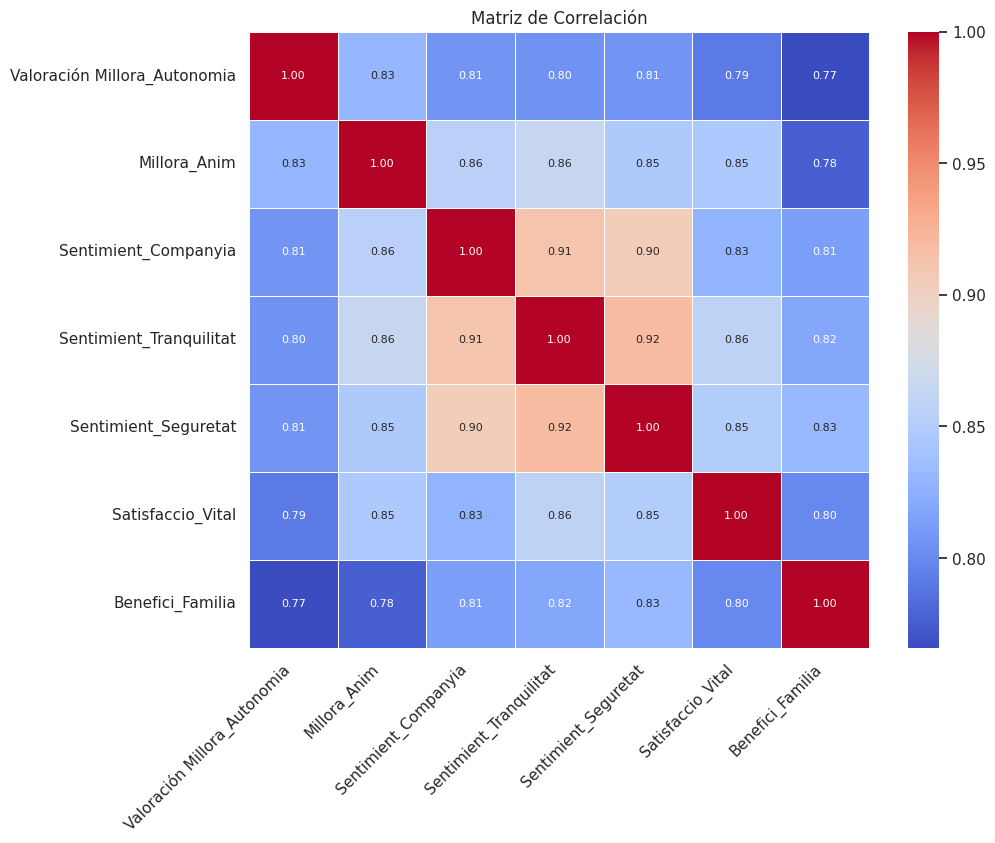

In [112]:
# Diccionario de renombrado para limpiar nombres
rename_dict = {
    "Millora_Autonomia": "Valoración Millora_Autonomia",
    "Millora_Anim": "Millora_Anim",
    "Sentimient_Companyia": "Sentimient_Companyia",
    "Sentimient_Tranquilitat": "Sentimient_Tranquilitat",
    "Sentimient_Seguretat": "Sentimient_Seguretat",
    "Satisfaccio_Vital": "Satisfaccio_Vital",
    "Benefici_Familia": "Benefici_Familia",
}

plot_correlation_matrix(df_filtrado[variables_num2], annot_size=8, rename_dict=rename_dict, cmap="coolwarm")

/home/narki/Projects/doctorado/scripts/plots.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=sns.color_palette(palette))
/home/narki/Projects/doctorado/scripts/plots.py:45: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x=x, y=y, palette=sns.color_palette(palette))


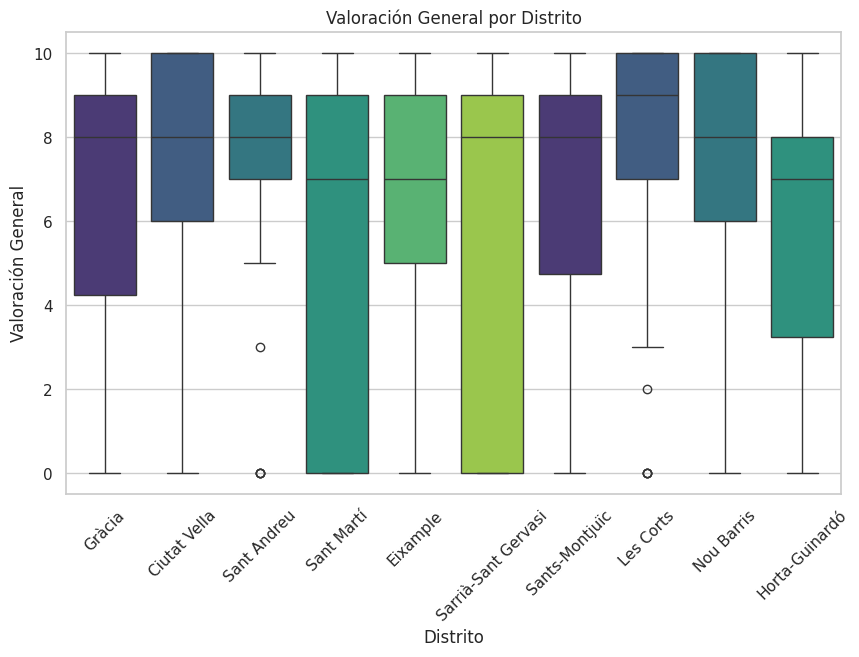

In [113]:
plot_box(df_filtrado_mayores, "Distrito", "Valoracion_General", y_label="Valoración General", palette="viridis", title = "Valoración General por Distrito")

#### Tareas domésticas (dedicación horaria)

In [40]:
variables = ["Sexo", "Horas_Domesticas", "Horas_Cuidados", "Horas_Cocinar", "Horas_Comprar_Alim", "Horas_Reparaciones", "Horas_Admin_Dinero"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 7)
Shape del DataFrame después del filtrado: (6624, 7)
Shape original del DataFrame: (1597, 7)
Shape del DataFrame después del filtrado: (1597, 7)


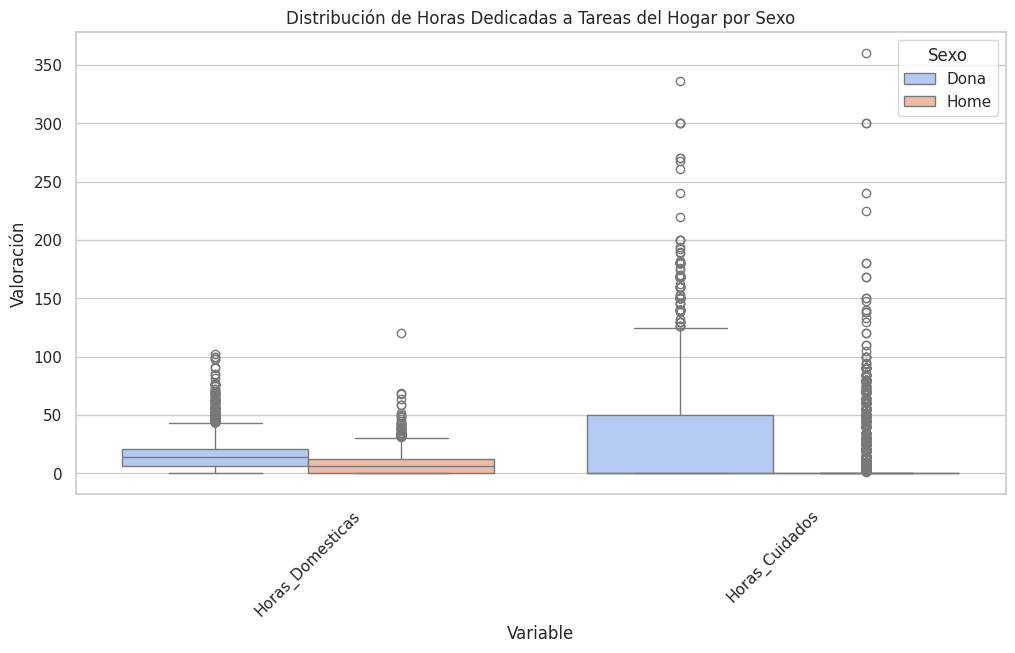

In [41]:
plot_multiple_numeric(df_filtrado, ["Horas_Domesticas", "Horas_Cuidados"], "Sexo", plot_type="boxplot", title="Distribución de Horas Dedicadas a Tareas del Hogar por Sexo")

Shape original del DataFrame: (6624, 8)
Shape del DataFrame después del filtrado: (6467, 8)
Shape original del DataFrame: (1597, 8)
Shape del DataFrame después del filtrado: (1555, 8)


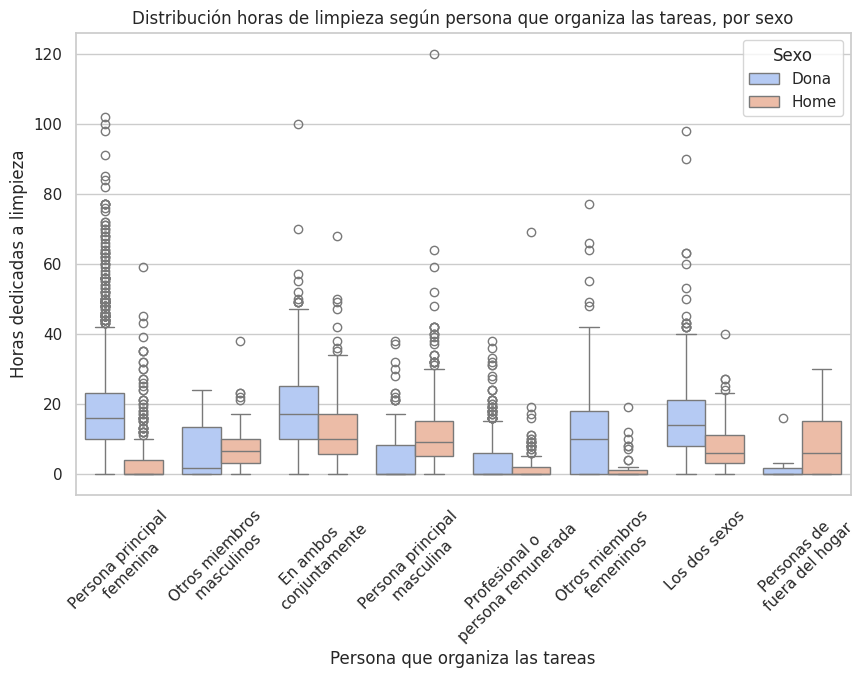

In [51]:
variables = ["Sexo", "Tareas_Domesticas", "Horas_Domesticas", "Horas_Cuidados", "Horas_Cocinar", "Horas_Comprar_Alim", "Horas_Reparaciones", "Horas_Admin_Dinero"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

rename_dict = {
    "Fonamentalment en la persona principal masculina" : "Persona principal\n masculina",
    "Fonamentalment en la persona principal femenina" : "Persona principal\n femenina",
    "En ambdós conjuntament": "En ambos \nconjuntamente",
    "Un altre o diversos membres femenins de la llar" : "Otros miembros\n femeninos",
    "Un altre o diversos membres masculins de la llar" : "Otros miembros\n masculinos",
    "Tots o diversos membres de la llar d'ambdós sexes" : "Los dos sexos",
    "Professional o persona remunerada" : "Profesional o \npersona remunerada",
    "Una o diverses persones de fora de la llar (no remunerades)": "Personas de \nfuera del hogar",
}

df_filtrado["Tareas_Domesticas"] = df_filtrado["Tareas_Domesticas"].replace(rename_dict)
df_filtrado_mayores["Tareas_Domesticas"] = df_filtrado_mayores["Tareas_Domesticas"].replace(rename_dict)

#plot_box(df_filtrado, "Tareas_Domesticas", "Horas_Domesticas", hue="Sexo", title="")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtrado, x="Tareas_Domesticas", y="Horas_Domesticas", hue="Sexo", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribución horas de limpieza según persona que organiza las tareas, por sexo")
plt.xlabel("Persona que organiza las tareas")
plt.ylabel("Horas dedicadas a limpieza")
plt.show()

Shape original del DataFrame: (6624, 12)
Shape del DataFrame después del filtrado: (6624, 12)
Shape original del DataFrame: (1597, 12)
Shape del DataFrame después del filtrado: (1597, 12)


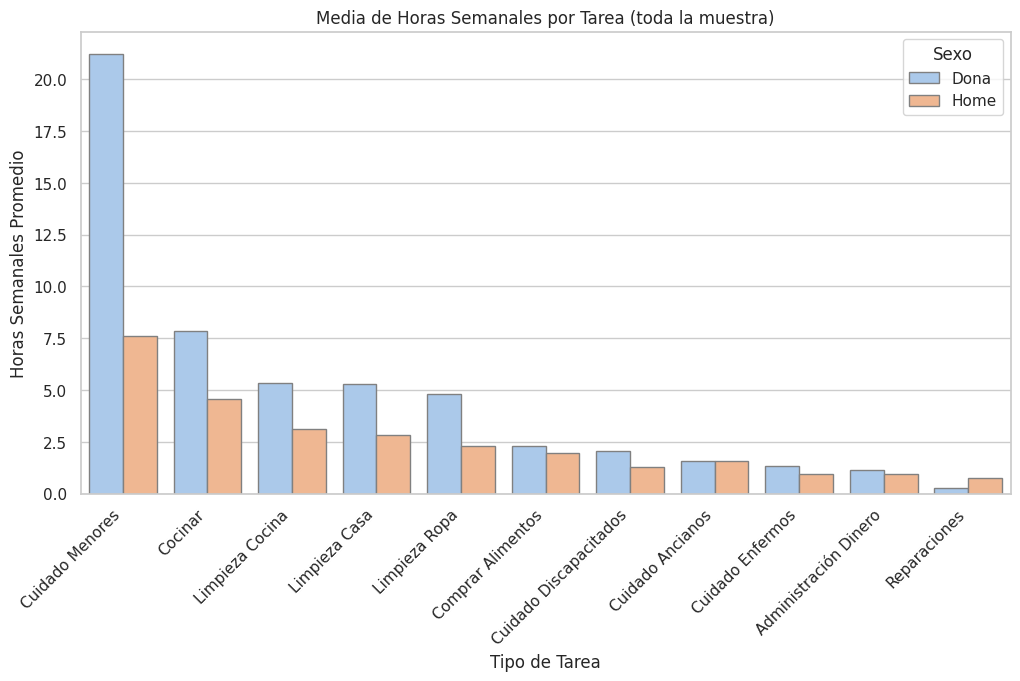

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables de horas dedicadas a cada tarea
variables = ["Horas_Limpieza_Ropa", 'Horas_Limpieza_Cocina', 'Horas_Limpieza_Casa',
             'Horas_Cocinar', 'Horas_Comprar_Alim', 'Horas_Reparaciones', 'Horas_Admin_Dinero',
             'Horas_Atencion_Ancianos', 'Horas_Atencion_Discapac', 'Horas_Atencion_Enfermos', 
             'Horas_Atencion_Menores']
            #'Horas_Domesticas', 'Horas_Cuidados']

df_filtrado = filter_variables(df[variables + ["Sexo"]])
df_filtrado_mayores = filter_variables(df_mayores[variables + ["Sexo"]])

# Diccionario de renombre de las tareas
rename_dict = {
    "Horas_Limpieza_Ropa": "Limpieza Ropa",
    "Horas_Limpieza_Cocina": "Limpieza Cocina",
    "Horas_Limpieza_Casa": "Limpieza Casa",
    #"Horas_Domesticas": "Total Tareas Domésticas",
    "Horas_Cocinar": "Cocinar",
    "Horas_Comprar_Alim": "Comprar Alimentos",
    "Horas_Reparaciones": "Reparaciones",
    "Horas_Admin_Dinero": "Administración Dinero",
    "Horas_Atencion_Ancianos": "Cuidado Ancianos",
    "Horas_Atencion_Discapac": "Cuidado Discapacitados",
    "Horas_Atencion_Enfermos": "Cuidado Enfermos",
    "Horas_Atencion_Menores": "Cuidado Menores",
    #"Horas_Cuidados": "Total Cuidados"
}

# Calcular la media de horas por categoría (e.g., Sexo)
mean_hours = df_filtrado.groupby("Sexo")[variables].mean().reset_index()

# Transformamos a formato largo para Seaborn
df_long = mean_hours.melt(id_vars=["Sexo"], var_name="Tarea", value_name="Horas Promedio")

# Renombrar las tareas según el diccionario
df_long["Tarea"] = df_long["Tarea"].replace(rename_dict)

# Ordenar las tareas de mayor a menor dedicación
order = df_long.groupby("Tarea")["Horas Promedio"].sum().sort_values(ascending=False).index

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Tarea", y="Horas Promedio", hue="Sexo", palette="pastel", order=order, edgecolor=".5")

# Ajustes de presentación
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tipo de Tarea")
plt.ylabel("Horas Semanales Promedio")
plt.title("Media de Horas Semanales por Tarea (toda la muestra)")
plt.legend(title="Sexo")
plt.show()

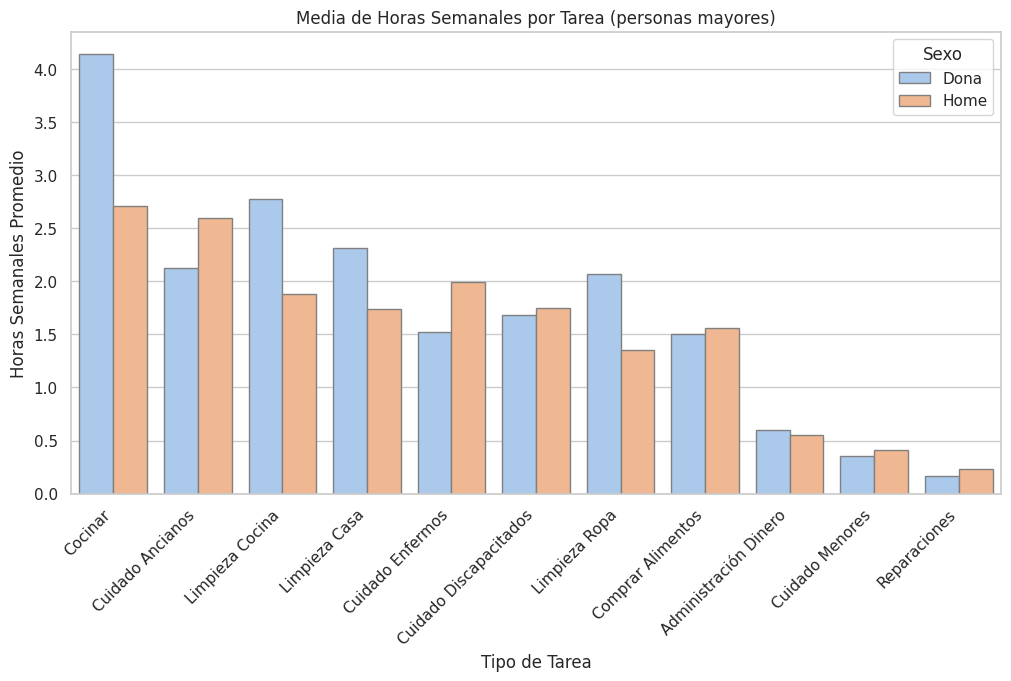

In [45]:
# Calcular la media de horas por categoría (e.g., Sexo)
mean_hours = df_filtrado_mayores.groupby("Sexo")[variables].mean().reset_index()

# Transformamos a formato largo para Seaborn
df_long = mean_hours.melt(id_vars=["Sexo"], var_name="Tarea", value_name="Horas Promedio")

# Renombrar las tareas según el diccionario
df_long["Tarea"] = df_long["Tarea"].replace(rename_dict)

# Ordenar las tareas de mayor a menor dedicación
order = df_long.groupby("Tarea")["Horas Promedio"].sum().sort_values(ascending=False).index

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=df_long, x="Tarea", y="Horas Promedio", hue="Sexo", palette="pastel", order=order, edgecolor=".5")

# Ajustes de presentación
plt.xticks(rotation=45, ha="right")
plt.xlabel("Tipo de Tarea")
plt.ylabel("Horas Semanales Promedio")
plt.title("Media de Horas Semanales por Tarea (personas mayores)")
plt.legend(title="Sexo")
plt.show()

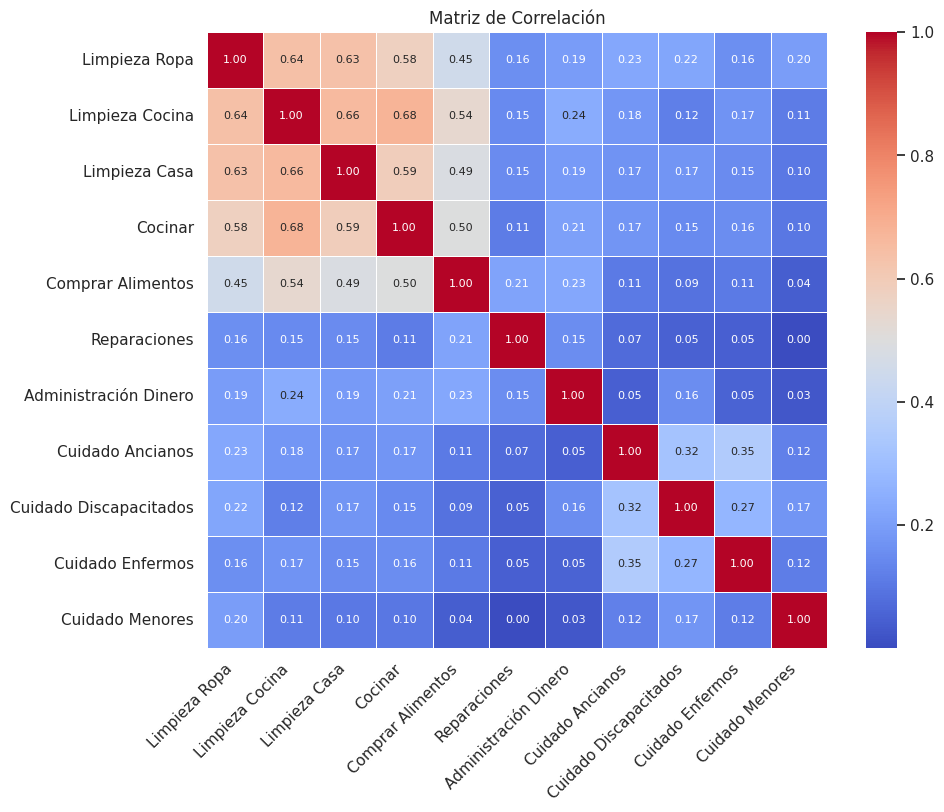

In [119]:
plot_correlation_matrix(df_filtrado_mayores[variables], annot_size=8, rename_dict=rename_dict, cmap="coolwarm")

***
***
## 2.3 Tablas capítulo 4

In [120]:
from scripts.tables import generar_tabla_frecuencias, analizar_cruce_bivariable, plot_table
from scripts.utils import filter_variables

### 2.3.1 Tipo de Hogar

#### Tabla Frecuencias de Tipo de Hogar

Te pongo las tres variables de tipo de hogar. `Tipo_Hogar` es la que creé yo y `Tipo_Hogar1` es otra que había en los datos. `Tipo_Hogar2` es la que querías (si no me equivoco), Así que es la que utilizaré de ahora en adelante.

1. Toda la muestra

In [121]:
tabla = generar_tabla_frecuencias(df, 'Tipo_Hogar')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar,Personas usuarias,Porcentaje
0,Persona sin hijos,2294,34.6
1,Persona con hijos,2172,32.8
2,Pareja con hijos,1600,24.2
3,Pareja sin hijos,558,8.4
4,Total,6624,100.0


In [122]:
tabla = generar_tabla_frecuencias(df, 'Tipo_Hogar1')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar1,Personas usuarias,Porcentaje
0,Llars amb nens dependents,3293,49.7
1,Unipersonals,1924,29.0
2,Llars sense nens dependents,1407,21.2
3,Total,6624,100.0


In [123]:
tabla = generar_tabla_frecuencias(df, 'Tipo_Hogar2')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar2,Personas usuarias,Porcentaje
0,Pare o mare amb fills/es (sense altres persones),1945,29.4
1,Unipersonal,1925,29.1
2,Parella amb fills/es (sense altres persones),1533,23.1
3,Parella sense fills/es (sense altres persones),531,8.0
4,Pare o mare amb fills/es (amb altres persones),230,3.5
5,Parella amb fills/es (amb altres persones),190,2.9
6,Dues o més persones sense nucli,160,2.4
7,Parella sense fills/es (amb altres persones),56,0.8
8,Dos o més nuclis,54,0.8
9,Total,6624,100.0


2. Personas mayores

In [124]:
tabla = generar_tabla_frecuencias(df_mayores, 'Tipo_Hogar')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar,Personas usuarias,Porcentaje
0,Persona sin hijos,916,57.4
1,Pareja sin hijos,341,21.4
2,Persona con hijos,274,17.2
3,Pareja con hijos,66,4.1
4,Total,1597,100.0


In [125]:
tabla = generar_tabla_frecuencias(df_mayores, 'Tipo_Hogar1')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar1,Personas usuarias,Porcentaje
0,Unipersonals,851,53.3
1,Llars sense nens dependents,689,43.1
2,Llars amb nens dependents,57,3.6
3,Total,1597,100.0


In [126]:
tabla = generar_tabla_frecuencias(df_mayores, 'Tipo_Hogar2')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tipo_Hogar2,Personas usuarias,Porcentaje
0,Unipersonal,851,53.3
1,Parella sense fills/es (sense altres persones),345,21.6
2,Pare o mare amb fills/es (sense altres persones),199,12.5
3,Parella amb fills/es (sense altres persones),83,5.2
4,Dues o més persones sense nucli,57,3.6
5,Pare o mare amb fills/es (amb altres persones),31,1.9
6,Parella sense fills/es (amb altres persones),17,1.1
7,Parella amb fills/es (amb altres persones),12,0.8
8,Dos o més nuclis,2,0.1
9,Total,1597,100.0


#### Tipo de Hogar por Sexo

1. Toda la muestra

In [127]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Tipo_Hogar2', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 614.18
Coeficiente Phi: 0.305
V Cramer: 0.305
Valor p: 0.0000


2. Personas mayores

In [128]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Tipo_Hogar2', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 87.86
Coeficiente Phi: 0.235
V Cramer: 0.235
Valor p: 0.0000


#### Tipo de Hogar por Subgrupo de Edad

1. Toda la muestra

Para toda la muestra utilizo la edad recodificada en intervalos iguales.

In [129]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Tipo_Hogar2', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 2322.83
Coeficiente Phi: 0.592
V Cramer: 0.265
Valor p: 0.0000


2. Personas mayores

Para personas mayores utilizaré la recodificación que estabas utilizando tu, separando las personas mayores en tres grupos.

In [130]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Tipo_Hogar2', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 60.23
Coeficiente Phi: 0.194
V Cramer: 0.137
Valor p: 0.0000


### 2.3.2 Origen geográfico

#### Tabla Frecuencias Origen geográfico

Te pongo las de frecuencias de la variable con los países desglosados, pero si no me equivoco hablamos de utilizar la de Espanya/Estrangers. Así que es la que utilizaré en adelante

In [131]:
tabla = generar_tabla_frecuencias(df, 'Pais_Nacimiento')
plot_table(tabla)

,Pais_Nacimiento,Personas usuarias,Porcentaje
0,España,3748,56.6
1,Altres,870,13.1
2,Marroc,614,9.3
3,Equador,305,4.6
4,República Dominicana,205,3.1
5,Bolívia,194,2.9
6,Perú,179,2.7
7,Colòmbia,143,2.2
8,Pakistan,126,1.9
9,Argentina,75,1.1


In [132]:
tabla = generar_tabla_frecuencias(df_mayores, 'Pais_Nacimiento')
plot_table(tabla)

,Pais_Nacimiento,Personas usuarias,Porcentaje
0,España,1476,92.4
1,Altres,45,2.8
2,Marroc,17,1.1
3,Argentina,17,1.1
4,França,12,0.8
5,Perú,12,0.8
6,Equador,6,0.4
7,Bolívia,3,0.2
8,Colòmbia,3,0.2
9,República Dominicana,3,0.2


In [133]:
tabla = generar_tabla_frecuencias(df, 'Lugar_Nacimiento')
plot_table(tabla)

,Lugar_Nacimiento,Personas usuarias,Porcentaje
0,Espanya,3748,56.6
1,Estranger,2876,43.4
2,Total,6624,100.0


In [134]:
tabla = generar_tabla_frecuencias(df_mayores, 'Lugar_Nacimiento')
plot_table(tabla)

,Lugar_Nacimiento,Personas usuarias,Porcentaje
0,Espanya,1476,92.4
1,Estranger,121,7.6
2,Total,1597,100.0


#### Origen geográfico por Edad

1. Toda la muestra

In [135]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Lugar_Nacimiento', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 1358.29
Coeficiente Phi: 0.453
V Cramer: 0.453
Valor p: 0.0000


2. Personas mayores

In [136]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Lugar_Nacimiento', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 91.08
Coeficiente Phi: 0.239
V Cramer: 0.239
Valor p: 0.0000


### 2.3.3 Riesgo Pobreza

#### Tabla de Frecuencias Riesgos de Pobreza

1. Toda la muestra

In [137]:
tabla = generar_tabla_frecuencias(df, 'Riesgo_Pobreza_30')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Riesgo_Pobreza_30,Personas usuarias,Porcentaje
0,No pobre,3938,59.5
1,Pobre,2686,40.5
2,Total,6624,100.0


In [138]:
tabla = generar_tabla_frecuencias(df, 'Riesgo_Pobreza_60')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Riesgo_Pobreza_60,Personas usuarias,Porcentaje
0,Pobre,4992,75.4
1,No pobre,1632,24.6
2,Total,6624,100.0


2. Personas mayores

In [139]:
tabla = generar_tabla_frecuencias(df_mayores, 'Riesgo_Pobreza_30')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Riesgo_Pobreza_30,Personas usuarias,Porcentaje
0,No pobre,1446,90.5
1,Pobre,151,9.5
2,Total,1597,100.0


In [140]:
tabla = generar_tabla_frecuencias(df_mayores, 'Riesgo_Pobreza_60')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Riesgo_Pobreza_60,Personas usuarias,Porcentaje
0,No pobre,815,51.0
1,Pobre,782,49.0
2,Total,1597,100.0


#### Riesgo de pobreza por Edad

1. Toda la muestra

In [141]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Riesgo_Pobreza_30', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 914.05
Coeficiente Phi: 0.371
V Cramer: 0.371
Valor p: 0.0000


In [142]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Riesgo_Pobreza_60', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 818.81
Coeficiente Phi: 0.352
V Cramer: 0.352
Valor p: 0.0000


2. Personas mayores

In [143]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Riesgo_Pobreza_30', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 24.27
Coeficiente Phi: 0.123
V Cramer: 0.123
Valor p: 0.0000


In [144]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Riesgo_Pobreza_60', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 23.58
Coeficiente Phi: 0.122
V Cramer: 0.122
Valor p: 0.0000


### 2.3.4 Edad por Sexo

#### Edad por Sexo

1. Toda la muestra

Para toda la muestra utilizo la edad recodificada en intervalos iguales.

In [145]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Edad_Recod2', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 321.62
Coeficiente Phi: 0.220
V Cramer: 0.220
Valor p: 0.0000


2. Personas mayores

Para personas mayores utilizaré la recodificación que estabas utilizando tu, separando las personas mayores en tres grupos.

In [146]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Edad_Recod2', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 12.42
Coeficiente Phi: 0.088
V Cramer: 0.088
Valor p: 0.0020


### 2.3.4 Categoría profesional por Sexo

#### Categoría profesional por Sexo

1. Toda la muestra

Para toda la muestra utilizo la edad recodificada en intervalos iguales.

In [147]:
variables = ["Sexo", "Categoria_Profesional"]
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 2)
Shape del DataFrame después del filtrado: (6464, 2)
Shape original del DataFrame: (1597, 2)
Shape del DataFrame después del filtrado: (1557, 2)


In [148]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado, 'Categoria_Profesional', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 592.70
Coeficiente Phi: 0.303
V Cramer: 0.303
Valor p: 0.0000


2. Personas mayores

Para personas mayores utilizaré la recodificación que estabas utilizando tu, separando las personas mayores en tres grupos.

In [149]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Categoria_Profesional', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 231.09
Coeficiente Phi: 0.385
V Cramer: 0.385
Valor p: 0.0000


***
***
## 2.4 Tablas capítulo 5

### 2.4.1 Vulnerabilidad económica

Hay un párrafo con muchos puntos en amarillo, de los que creo que habría que elegir solo alguno porque serían muchisimas tablas. Pongo algunas tablas de frecuencias de TODA LA MUESTRA para que me digas como lo ves.

#### Tablas de Frecuencias

In [150]:
tabla = generar_tabla_frecuencias(df_mayores, 'Telefono_Disponible')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Telefono_Disponible,Personas usuarias,Porcentaje
0,Sí,1573,99.1
1,No,13,0.8
2,No contesta,2,0.1
3,Total,1588,100.0


In [151]:
tabla = generar_tabla_frecuencias(df_mayores, 'Lavadora_Disponible')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Lavadora_Disponible,Personas usuarias,Porcentaje
0,Sí,1507,94.9
1,No,79,5.0
2,No contesta,2,0.1
3,Total,1588,100.0


In [152]:
tabla = generar_tabla_frecuencias(df_mayores, 'TV_Disponible')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,TV_Disponible,Personas usuarias,Porcentaje
0,Sí,1551,97.7
1,No,35,2.2
2,No contesta,2,0.1
3,Total,1588,100.0


In [153]:
tabla = generar_tabla_frecuencias(df_mayores, 'TarjetaCredito')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,TarjetaCredito,Personas usuarias,Porcentaje
0,No,1086,68.0
1,Sí,511,32.0
2,Total,1597,100.0


In [154]:
tabla = generar_tabla_frecuencias(df_mayores, 'Coche')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Coche,Personas usuarias,Porcentaje
0,No,1321,82.7
1,Sí,276,17.3
2,Total,1597,100.0


In [155]:
tabla = generar_tabla_frecuencias(df_mayores, 'Vater_Disponible')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Vater_Disponible,Personas usuarias,Porcentaje
0,Sí,1569,98.8
1,No,17,1.1
2,No contesta,2,0.1
3,Total,1588,100.0


In [156]:
tabla = generar_tabla_frecuencias(df_mayores, 'Ducha_Disponible')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Ducha_Disponible,Personas usuarias,Porcentaje
0,Sí,1555,97.9
1,No,31,2.0
2,No contesta,2,0.1
3,Total,1588,100.0


In [157]:
tabla = generar_tabla_frecuencias(df_mayores, 'Mala_Ventilacion')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Mala_Ventilacion,Personas usuarias,Porcentaje
0,No,1480,93.2
1,Sí,104,6.5
2,No contesta,4,0.3
3,Total,1588,100.0


In [158]:
tabla = generar_tabla_frecuencias(df_mayores, 'Problemas_Estructura')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Problemas_Estructura,Personas usuarias,Porcentaje
0,No,1459,91.9
1,Sí,94,5.9
2,No ho sap,30,1.9
3,No contesta,5,0.3
4,Total,1588,100.0


In [159]:
tabla = generar_tabla_frecuencias(df_mayores, 'Contaminacion_Medioambiental')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Contaminacion_Medioambiental,Personas usuarias,Porcentaje
0,No,1227,77.3
1,Sí,354,22.3
2,No ho sap,5,0.3
3,No contesta,2,0.1
4,Total,1588,100.0


In [160]:
tabla = generar_tabla_frecuencias(df_mayores, 'Delincuencia_Vandalismo')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Delincuencia_Vandalismo,Personas usuarias,Porcentaje
0,No,1053,66.3
1,Sí,522,32.9
2,No ho sap,11,0.7
3,No contesta,2,0.1
4,Total,1588,100.0


In [161]:
tabla = generar_tabla_frecuencias(df_mayores, 'Vacaciones_Anual')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Vacaciones_Anual,Personas usuarias,Porcentaje
0,No,1256,78.6
1,Sí,334,20.9
2,No contesta,5,0.3
3,No ho sap,2,0.1
4,Total,1597,100.0


In [162]:
tabla = generar_tabla_frecuencias(df_mayores, 'Gasto_Imprevisto_800')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Gasto_Imprevisto_800,Personas usuarias,Porcentaje
0,No,1206,75.5
1,Sí,376,23.5
2,No ho sap,11,0.7
3,No contesta,4,0.3
4,Total,1597,100.0


In [163]:
tabla = generar_tabla_frecuencias(df_mayores, 'Acudio_ONG')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Acudio_ONG,Personas usuarias,Porcentaje
0,No,1246,78.0
1,Sí,351,22.0
2,Total,1597,100.0


In [164]:
tabla = generar_tabla_frecuencias(df_mayores, 'Mora_Hipoteca')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Mora_Hipoteca,Personas usuarias,Porcentaje
0,No ha de realitzar aquest tipus de pagament,1509,94.5
1,No,66,4.1
2,"Sí, dues vegades o més",19,1.2
3,"Sí, només una vegada",2,0.1
4,No contesta,1,0.1
5,Total,1597,100.0


In [165]:
tabla = generar_tabla_frecuencias(df_mayores, 'Mora_Prestamos')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Mora_Prestamos,Personas usuarias,Porcentaje
0,No,1213,76.0
1,No ha de realitzar aquest tipus de pagament,320,20.0
2,"Sí, dues vegades o més",38,2.4
3,"Sí, només una vegada",22,1.4
4,No contesta,2,0.1
5,No ho sap,2,0.1
6,Total,1597,100.0


In [166]:
tabla = generar_tabla_frecuencias(df_mayores, 'Mora_Alquiler')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Mora_Alquiler,Personas usuarias,Porcentaje
0,No ha de realitzar aquest tipus de pagament,943,59.0
1,No,529,33.1
2,"Sí, dues vegades o més",87,5.4
3,"Sí, només una vegada",31,1.9
4,No contesta,7,0.4
5,Total,1597,100.0


In [167]:
tabla = generar_tabla_frecuencias(df_mayores, 'Mora_Servicios')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Mora_Servicios,Personas usuarias,Porcentaje
0,No,1353,84.7
1,"Sí, dues vegades o més",162,10.1
2,"Sí, només una vegada",53,3.3
3,No ha de realitzar aquest tipus de pagament,25,1.6
4,No contesta,3,0.2
5,No ho sap,1,0.1
6,Total,1597,100.0


In [168]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Acudio_ONG', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 225.25
Coeficiente Phi: 0.376
V Cramer: 0.376
Valor p: 0.0000


### 2.4.2 Final de mes

#### Tabla de Frecuencias

In [169]:
tabla = generar_tabla_frecuencias(df, 'Fin_De_Mes')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Fin_De_Mes,Personas usuarias,Porcentaje
0,Amb molta dificultat,4430,66.9
1,Amb dificultat,1115,16.8
2,Amb certa dificultat,671,10.1
3,Amb certa facilitat,301,4.5
4,Amb facilitat,94,1.4
5,Amb molta facilitat,13,0.2
6,Total,6624,100.0


#### Final de mes por Sexo

1. Toda la muestra

In [170]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Fin_De_Mes', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 7.45
Coeficiente Phi: 0.034
V Cramer: 0.034
Valor p: 0.1891


2. Personas Mayores

In [171]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Fin_De_Mes', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 4.94
Coeficiente Phi: 0.056
V Cramer: 0.056
Valor p: 0.4233


#### Final de mes por Edad

1. Toda la muestra

In [172]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Fin_De_Mes', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 1057.14
Coeficiente Phi: 0.399
V Cramer: 0.179
Valor p: 0.0000


2. Personas Mayores

In [173]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Fin_De_Mes', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 173.80
Coeficiente Phi: 0.330
V Cramer: 0.233
Valor p: 0.0000


### 2.4.3 Régimen de tenencia de Vivienda.

#### Tabla de Frecuencias

In [174]:
tabla = generar_tabla_frecuencias(df, 'Propietat_Habitatge')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Propietat_Habitatge,Personas usuarias,Porcentaje
0,En lloguer o relloguer a preu de mercat,2594,39.2
1,En propietat,1650,24.9
2,En lloguer o relloguer a preu inferior al de mercat,1306,19.7
3,Habitació de lloguer,375,5.7
4,En cessió gratuïta,351,5.3
5,Ocupació,213,3.2
6,Altres,130,2.0
7,NS/NC,5,0.1
8,Total,6624,100.0


#### Tenencia de Vivienda por Sexo

1. Toda la muestra

In [175]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Propietat_Habitatge', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 107.84
Coeficiente Phi: 0.128
V Cramer: 0.128
Valor p: 0.0000


2. Personas mayores

In [176]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Propietat_Habitatge', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 39.49
Coeficiente Phi: 0.157
V Cramer: 0.157
Valor p: 0.0000


#### Tenencia de Vivienda por Edad

1. Toda la muestra

In [177]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df, 'Propietat_Habitatge', 'Edad_Recod')
plot_table(tabla, columnas_casos=[
    ('16 - 24', 'Porcentaje'), ('25 - 34', 'Porcentaje'), ('35 - 44', 'Porcentaje'), ('45 - 54', 'Porcentaje'), ('55 - 64', 'Porcentaje'), ('65 i més', 'Porcentaje'), ('Total', 'Porcentaje')
    ])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 1122.51
Coeficiente Phi: 0.412
V Cramer: 0.184
Valor p: 0.0000


2. Personas mayores

In [178]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Propietat_Habitatge', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 128.96
Coeficiente Phi: 0.284
V Cramer: 0.201
Valor p: 0.0000


### 2.4.4 Reparto de tareas domésticas

In [179]:
from scripts.utils import filter_variables

variables = ['Sexo', 'Tareas_Domesticas', 'Tipo_Hogar3', 'Categoria_Profesional', 'Nivel_Estudios']
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 5)
Shape del DataFrame después del filtrado: (6432, 5)
Shape original del DataFrame: (1597, 5)
Shape del DataFrame después del filtrado: (1543, 5)


#### Tabla de frecuencias

In [180]:
tabla = generar_tabla_frecuencias(df_filtrado, 'Tareas_Domesticas')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Tareas_Domesticas,Personas usuarias,Porcentaje
0,Fonamentalment en la persona principal femenina,3311,51.5
1,Fonamentalment en la persona principal masculina,869,13.5
2,En ambdós conjuntament,726,11.3
3,Professional o persona remunerada,639,9.9
4,Tots o diversos membres de la llar d'ambdós sexes,473,7.4
5,Un altre o diversos membres femenins de la llar,332,5.2
6,Un altre o diversos membres masculins de la llar,59,0.9
7,Una o diverses persones de fora de la llar (no remunerades),23,0.4
8,Total,6432,100.0


#### Reparto de tareas por Sexo

1. Toda la muestra

In [181]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado, 'Tareas_Domesticas', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 2152.80
Coeficiente Phi: 0.579
V Cramer: 0.579
Valor p: 0.0000


2. Personas mayores

In [182]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Tareas_Domesticas', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 178.31
Coeficiente Phi: 0.340
V Cramer: 0.340
Valor p: 0.0000


#### Reparto de tareas por Tipo de Hogar

1. Toda la muestra

In [183]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado, 'Tareas_Domesticas', 'Tipo_Hogar3')
plot_table(tabla)
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 2573.24
Coeficiente Phi: 0.633
V Cramer: 0.316
Valor p: 0.0000


2. Personas mayores

In [184]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Tareas_Domesticas', 'Tipo_Hogar3')
plot_table(tabla)
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 272.85
Coeficiente Phi: 0.421
V Cramer: 0.210
Valor p: 0.0000


### 2.4.5 Estado de Salud

In [185]:
from scripts.utils import filter_variables

variables = ['Sexo', 'Estado_Salud', 'Tipo_Hogar3', 'Edad_Recod', 'Edad_Recod2', 'Nivel_Estudios', 'Categoria_Profesional']
df_filtrado = filter_variables(df[variables])
df_filtrado_mayores = filter_variables(df_mayores[variables])

Shape original del DataFrame: (6624, 7)
Shape del DataFrame después del filtrado: (6185, 7)
Shape original del DataFrame: (1597, 7)
Shape del DataFrame después del filtrado: (1315, 7)


#### Tabla de Frecuencias

In [186]:
tabla = generar_tabla_frecuencias(df_filtrado, 'Estado_Salud')
plot_table(tabla, columnas_casos=['Personas usuarias'])

,Estado_Salud,Personas usuarias,Porcentaje
0,Regular,2215,35.8
1,Bo,1692,27.4
2,Dolent,1196,19.3
3,Molt dolent,736,11.9
4,Molt bo,346,5.6
5,Total,6185,100.0


#### Estado de Salud por Sexo

1. Toda la muestra

In [187]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado, 'Estado_Salud', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 15.24
Coeficiente Phi: 0.050
V Cramer: 0.050
Valor p: 0.0042


2. Personas mayores

In [188]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Estado_Salud', 'Sexo')
plot_table(tabla, columnas_casos=[('Dona', 'Porcentaje'), ('Home', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 16.55
Coeficiente Phi: 0.112
V Cramer: 0.112
Valor p: 0.0024


#### Estado de Salud por Edad

1. Toda la muestra

In [189]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado, 'Estado_Salud', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 840.66
Coeficiente Phi: 0.369
V Cramer: 0.184
Valor p: 0.0000


2. Personas mayores

In [190]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_mayores, 'Propietat_Habitatge', 'Edad_Recod2')
plot_table(tabla, columnas_casos=[('65 - 74', 'Porcentaje'), ('75 - 84', 'Porcentaje'), ('85 i més', 'Porcentaje'), ('Total', 'Porcentaje')])
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 128.96
Coeficiente Phi: 0.284
V Cramer: 0.201
Valor p: 0.0000


#### Estado de Salud por Nivel estudios

2. Personas mayores

In [191]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Estado_Salud', 'Nivel_Estudios')
plot_table(tabla)
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 45.07
Coeficiente Phi: 0.185
V Cramer: 0.107
Valor p: 0.0000


#### Estado de Salud por Categoría profesional

2. Personas mayores

In [192]:
tabla, chi2, phi, cramer_v, p = analizar_cruce_bivariable(df_filtrado_mayores, 'Categoria_Profesional', 'Estado_Salud')
plot_table(tabla)
print(f"Chi-cuadrado (Χ²): {chi2:.2f}\nCoeficiente Phi: {phi:.3f}\nV Cramer: {cramer_v:.3f}\nValor p: {p:.4f}")

Chi-cuadrado (Χ²): 58.95
Coeficiente Phi: 0.212
V Cramer: 0.106
Valor p: 0.0006


### 2.4.6 Otras

Se puede valorar cruzar otras variables. Ahora ya está preparado para hacerlo de manera facil. Pero creo que no tiene sentido sacar muchas más tablas hasta tener claro cuáles se van a incluir y si son necesarias o no.